# Dicionarios com Lexicos
- Os lexicos são bancos de dados criados manualmente ou de forma automatizada

Ler o arquivo lexico

In [1]:
sentilex = open('SentiLex-PT01\SentiLex-lem-PT01.txt','r')

Construindo um dicionario de dpalavras e Polaridades

In [2]:
dic_palavra_pol= {}

with open('SentiLex-PT01\SentiLex-lem-PT01.txt','r',encoding='utf-8') as file:

    for line in file:
        pos_ponto = line.find('.')# Encontrar a posição do ponto

        if pos_ponto == -1: # Se não encontrar pular para proxima linha
            continue
        
        palavra = line[:pos_ponto] # Pegar a palavra (antes do ponto)

        pol_pos = line.find('POL')# Encontrar a posição da string POL

        if pol_pos == -1: # Se não encontrar POL pular para proxima linha
            continue

        polaridade = line[pol_pos+4:pol_pos+6].replace(';','').strip() # Obtem a polaridade da palavra (numero pos 'POL=')

        try: # Tenta converter a polaridade para inteiro
            polaridade = int(polaridade)
        except ValueError:
            continue

        dic_palavra_pol[palavra]=polaridade # atuliza a palavra com o dicionario e a polaridade

In [3]:
print(dic_palavra_pol)

{'\ufeffabafado': -1, 'abafante': -1, 'abaixado': -1, 'abalado': -1, 'abalizado': 1, 'abandalhado': -1, 'abandonado': -1, 'abarcante': -1, 'abarrotado': -1, 'abastado': 1, 'abastecido': 0, 'abatido': -1, 'abelhudo': -1, 'abençoado': 1, 'aberrante': -1, 'aberrativo': -1, 'aberto': 1, 'abespinhado': -1, 'abestalhado': -1, 'abilolado': -1, 'abismado': -1, 'abismal': -1, 'abjecto': -1, 'abjeto': -1, 'abnegado': 1, 'abobado': -1, 'abobalhado': -1, 'abolicionista': 0, 'abolido': -1, 'abominador': -1, 'abominando': -1, 'abominável': -1, 'abonado': 1, 'abonatório': 1, 'abonecado': 0, 'aborígene': -1, 'aborrecido': -1, 'abortado': -1, 'abraçado': 1, 'abrangente': -1, 'abrangido': -1, 'abrasileirado': 0, 'abrigado': 0, 'abrilhantado': 1, 'abrupto': -1, 'abrutalhado': -1, 'absentista': -1, 'absolutista': 0, 'absoluto': 0, 'absolvido': 0, 'absorto': -1, 'absorvente': 1, 'abstémico': 1, 'abstémio': 1, 'abstencionista': 0, 'abstinente': 0, 'abstraccionista': 0, 'abstracto': -1, 'abstraído': -1, 'abs

Consultando a polaridade de algumas palavras

In [4]:
print(dic_palavra_pol.get('abusivo'))

-1


In [5]:
print(dic_palavra_pol.get('liberal'))

0


In [6]:
print(dic_palavra_pol.get('sorridente'))

1


# Processando Frases - Base de Dados

In [7]:
def Score_sentimento(frase):
    frase = frase.lower() # Colocando toda a frase em minusculo
    l_sentimento = [] # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_pol.get(p,0))) # Para cara palavra obtem a polaridade
    print(l_sentimento)
    score = sum(l_sentimento) # Soma todos os valores da lista
    if score > 0:
        return f'Positivo, score {score}' # Se maior que 0 retorna positivo
    elif score == 0:
        return f'Neutro, score {score}' # Se igual que 0 retorna neutro
    else:
        return f'Negativo, score {score}' # Se menor que 0 retorna negativo

In [8]:
Score_sentimento['Eu estou feliz hoje mas vou ficar triste']

TypeError: 'function' object is not subscriptable

# Analise de sentimentos usando machine learning
- Criar modelos para nalise de sentomentos de tweets da base 'Tweets_Mg.csv'
- Testar modelo usando tag de negação 
- Testar modelo usando Bigrams

In [1]:
import nltk
from nltk import word_tokenize
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

Recap imports 

- NLTK - é uma biblioteca flexivel para trabalhar com dados de linguagem natural. Ela oferece ferramentas para processamento de texto, incluindo tokenização, stemming, taggin, parsing entre outras
    - Word_tokenize: divide a string em palavras
- Re - é um modulo para trabalhar com expressões regulares
- Pandas - utilizado para manipulação e analise de dados
- Sklearn(scikit-learning) - é uma biblioteca para aprendizado de maquina em python, que possui ferramentas eficientes para analise de dados
    - CountVectorizer: Converte uma coleção de documentos de texto em uma matriz de contagens de tokens, que é util para transforma textos em vetores numericos, que podem ser usado como entrada para algoritmos de macine learning
    - MultinomialNB: Implemnta o classificador Naive Bayes para dados distribuidos mulnomial
    - Metrics: Modulo que contem ferramentas para avaliar modelos de aprendizado de maquina. Inclui informações para calcular metricas de precisão, recall, F1-score, entre outras
    - cross_valpredict: executa validação cruzada em um estimador e rtorna as previsões para cara amostra de entrada

In [2]:
# Ler aquivos de dados

dataset = pd.read_csv('SentiLex-PT01/Tweets_Mg.csv',encoding='utf-8')

In [11]:
dataset.Text.head(20)

0     ���⛪ @ Catedral de Santo Antônio - Governador ...
1     � @ Governador Valadares, Minas Gerais https:/...
2     �� @ Governador Valadares, Minas Gerais https:...
3                           ��� https://t.co/BnDsO34qK0
4     ��� PSOL vai questionar aumento de vereadores ...
5     " bom é bandido morto"\nDeputado Cabo Júlio é ...
6     "..E 25% dos mineiros dizem não torcer para ti...
7     "A gigantesca barba do mal" em destaque no cad...
8     "BB e governo de Minas travam disputa sobre de...
9     "com vcs bh fica pequena!" Belo Horizonte (pro...
10    "Daí a gente visita governador valadares"\n"Qu...
11    "É bonita e é bonita..." \n#latergram #ibituru...
12    "erro desconhecido" é mato! Aliás, é da secret...
13    "La La Land: Cantando Estações" arrasa no Glob...
14    "La La Land: Cantando Estações" arrasa no Glob...
15    "Los abusos, aun en el estado más sólido, son ...
16    "Mesmo sem muito dinheiro no caixa o governo d...
17    "Modelo de segurança será o nosso legado",

Contando a quantidade de tweets neutros, positivos e negativos

In [12]:
dataset[dataset.Classificacao=='Neutro'].count()

Unnamed: 0                   2453
Created At                   2453
Text                         2453
Geo Coordinates.latitude      102
Geo Coordinates.longitude     102
User Location                1712
Username                     2453
User Screen Name             2453
Retweet Count                2453
Classificacao                2453
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [13]:
dataset[dataset.Classificacao=='Positivo'].count()

Unnamed: 0                   3300
Created At                   3300
Text                         3300
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                2118
Username                     3300
User Screen Name             3300
Retweet Count                3300
Classificacao                3300
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [14]:
dataset[dataset.Classificacao=='Negativo'].count()

Unnamed: 0                   2446
Created At                   2446
Text                         2446
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                1659
Username                     2446
User Screen Name             2446
Retweet Count                2446
Classificacao                2446
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [15]:
dataset.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

<Axes: xlabel='Classificacao'>

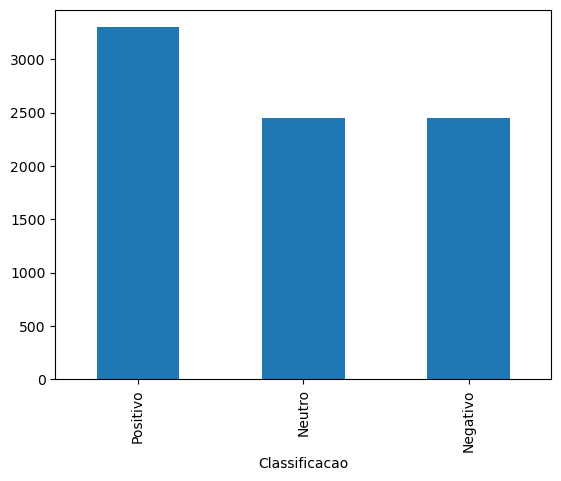

In [16]:
dataset.Classificacao.value_counts().plot(kind='bar')

# Pre-processamento de dados
- Removendo linhas duplicadas na base de dados
- problemas na coleta de dados 
- Removendo stopswords
- Fazendo Steeming nos dados 
- Removendo caracteres indesejados

In [3]:
dataset.drop_duplicates(['Text'],inplace=True)#Removendo linhas(tweets) duplicados

<Axes: xlabel='Classificacao'>

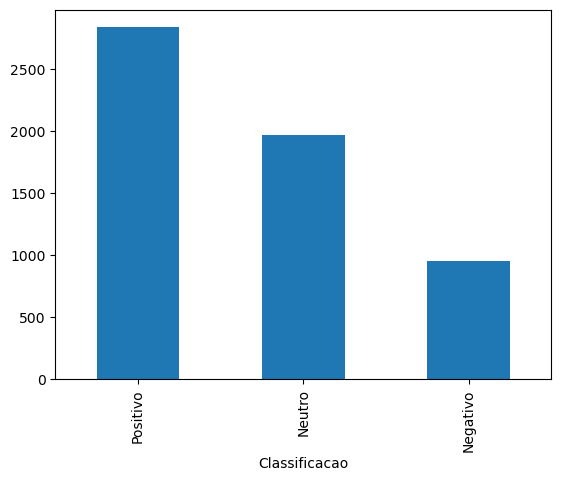

In [27]:
dataset.Classificacao.value_counts().plot(kind='bar')

In [26]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

# Separando tweets e suas classes

In [4]:
tweets = dataset['Text']
classes = dataset['Classificacao']

In [5]:
# Verificar se o pacote 'wordnet' e o 'rslp' está instalado caso contrario fazer o download
try:
    nltk.data.find('stopwords')
    print("O pacote 'wordnet' já está instalado.")
except LookupError:
    print("O pacote 'wordnet' não está instalado. Baixando agora...")
    nltk.download('stopwords')

try:
    nltk.data.find('rslp')
    print("O pacote 'rslp' já esta instalado")
except LookupError:
    print("O pacote 'rslp' não está instalado. Baixando agora...")
    nltk.download('rslp')

O pacote 'wordnet' não está instalado. Baixando agora...
O pacote 'rslp' não está instalado. Baixando agora...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


Função de pre processamento de dados

In [22]:
def removeStopwords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [23]:
removeStopwords('Eu não gosto de python e não vou aprender')# Remove palavras stopwords

'Eu gosto python vou aprender'

In [24]:
def stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [25]:
stemming("Eu não gosto de python e não vou aprender")#Reduz as palavras ao seu radical

'eu não gost de python e não vou aprend'

In [26]:
def limpeza_dados(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.', '').replace(':', '').replace('-', '').replace(';', '').replace(')', '')
    return instancia


In [27]:
limpeza_dados('Visite o site https://www.sitealeatorio.com.br  ;) :)')

'visite o site    '

__Aplicando 3 funções de pre processamento nos dados__

In [7]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S","",instancia).lower().replace('.','').replace('-','.').replace(':','').replace(';','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [8]:
tweets = [Preprocessing(i) for i in tweets]

In [34]:
tweets.head(10)

0    ���⛪ @ Catedral de Santo Antônio - Governador ...
1    � @ Governador Valadares, Minas Gerais https:/...
2    �� @ Governador Valadares, Minas Gerais https:...
3                          ��� https://t.co/BnDsO34qK0
4    ��� PSOL vai questionar aumento de vereadores ...
5    " bom é bandido morto"\nDeputado Cabo Júlio é ...
6    "..E 25% dos mineiros dizem não torcer para ti...
7    "A gigantesca barba do mal" em destaque no cad...
8    "BB e governo de Minas travam disputa sobre de...
9    "com vcs bh fica pequena!" Belo Horizonte (pro...
Name: Text, dtype: object

In [10]:
tweets[:50]

['���⛪ @ catedr sant antôni . govern valadares/mg //tco/jsbkamiquj',
 '� @ govern valadares, min geral //tco/b3thidjcsf',
 '�� @ govern valadares, min geral //tco/dpkgzvr2qw',
 '��� //tco/bndso34qk0',
 '��� psol vai quest aument vere prefeit bh justiç . poli . est min //tco/dmg7bgsek5',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano . poli . est min //tco/3gfaqvrfh',
 '"e 25% min diz torc tim nenhum,mesm dentr est atlético.mg cruz pq?" //tco/fn5evllqsr',
 '"a gigantesc barb mal" destaqu cadern cult est min //tco/pxnuriktlw',
 '"bb govern min tr disput sobr depósit judiciais" //tco/cnmu2a2qo5',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²',
 '"daí gent visit govern valadares" "qu lug eh mãe?" "mg, gent um parent la" man ond q parent',
 '"é bonit bonita" #latergr #ibiturun #hom @ govern valadares, min geral //tco/y12ttnqpnh',
 '"err desconhecido" mato! aliás, secret estad fazend tá assim mg precis dinh não, governador?

__Criando o modelo__
Instancia o objeto que faz a vetorização dos dados de texto

In [11]:
vectorizer = CountVectorizer(analyzer="word")

__Aplicar o vetorizador nos dados de texto__

In [12]:
freq_tweets = vectorizer.fit_transform(tweets)

In [13]:
type(freq_tweets)

scipy.sparse._csr.csr_matrix

In [14]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

__Formato(linha,coluna) da matriz__

In [15]:
freq_tweets.shape

(5765, 11799)

__Matriz A__

In [16]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Teste de modelo com instancias simples

In [21]:
testes= ['Esse governo esta no inicioa, vamos ver o que vai dar',
         'Estou muito feliz com o governo de minas esse ano',
         'O estado de minas gerais decretou calamidade financeira',
         'A segurança desse pais esta deixando a desejar',
         'O governador de minas é mais uma vez do PT']

In [22]:
testes = [Preprocessing(i) for i in testes]

In [23]:
freq_tweets = vectorizer.transform(testes)#Transformando os dados de teste em vetores de palavras   

In [24]:
for t, c in zip(testes, modelo.predict(freq_tweets)):#Fazendo a classidicação com o modelo treinado
    print(t+", "+c)

govern inicioa, vam ver vai dar, Neutro
feliz govern min ano, Neutro
est min geral decret calam financ, Negativo
seguranç dess pal deix desej, Neutro
govern min vez pt, Negativo


In [25]:
print(modelo.classes_)
modelo.predict_proba(freq_tweets).round(2)#Probabilidade de cada classe

['Negativo' 'Neutro' 'Positivo']


array([[0.08, 0.92, 0.  ],
       [0.01, 0.97, 0.02],
       [0.99, 0.01, 0.  ],
       [0.02, 0.94, 0.04],
       [0.58, 0.41, 0.  ]])

# Função de Tags de Negação
- Acrescentar uma tag_NEG encontrada após um 'não'
- Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase
- EX:
    - Eu gosto de gatos, positivo
    - Eu __não__ gosto de gatos, negativo

In [29]:
def tag_neg(texto):
    negacao = ['não','not']
    neg_detect = False
    result = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if neg_detect == True:
            p = p +'_NEG'
        if p in negacao:
            neg_detect = True
        result.append(p)
    return(" ".join(result))
        

Utilizando tag de negação

In [30]:
tag_neg('Eu gosto do partido, votaria novamento nesse governate')

'eu gosto do partido, votaria novamento nesse governate'

In [31]:
tag_neg('Eu não gosto do partido, e tambem Não votaria novamente nesse governante')

'eu não gosto_NEG do_NEG partido,_NEG e_NEG tambem_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante_NEG'

__CRIANDO MODELOS COM PIPELINES__


In [32]:
from sklearn.pipeline import Pipeline

In [33]:
pipeline_simples = Pipeline([
    ('counts',CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [34]:
pipeline_negacao= Pipeline([
    ('counts',CountVectorizer(tokenizer=lambda text: tag_neg(text))),
    ('classifier',MultinomialNB())
])

In [35]:
pipeline_simples.fit(tweets,classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [36]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

In [37]:
pipeline_negacao.fit(tweets,classes)

c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x000002D5A65B7100>)),
                ('classifier', MultinomialNB())])

In [38]:
pipeline_negacao.steps

[('counts',
  CountVectorizer(tokenizer=<function <lambda> at 0x000002D5A65B7100>)),
 ('classifier', MultinomialNB())]

__Gerando modelo com validação cruzada__
- Cross validation do modelo

In [39]:
resultados = cross_val_predict(pipeline_simples,tweets,classes,cv=10)

- Medindo a acuracia media do modelo

In [41]:
metrics.accuracy_score(classes,resultados)

0.8782307025151778

In [44]:
sentimentos = ['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes,resultados,target_names=sentimentos))

              precision    recall  f1-score   support

    Positivo       0.85      0.88      0.86       951
    Negativo       0.81      0.89      0.84      1974
      Neutro       0.95      0.87      0.91      2840

    accuracy                           0.88      5765
   macro avg       0.87      0.88      0.87      5765
weighted avg       0.88      0.88      0.88      5765



- Matriz confuão

In [45]:
print(pd.crosstab(classes,resultados,rownames=['Real'],colnames=['Predito'],margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       834     107        10   951
Neutro         104    1750       120  1974
Positivo        46     315      2479  2840
All            984    2172      2609  5765


__Fazendo acuracia com o modelo de tag de negação__

In [46]:
resultados = cross_val_predict(pipeline_negacao,tweets,classes,cv=10)

c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Guilherme\anacon